In [68]:
#simulation of AR(2) model from the Ding paper

In [69]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn

In [70]:
seed(1)
l = 500000
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesX = Series(series)

seed(3)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesXtest = Series(series)

In [71]:
seed(2)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesY = Series(series)

In [72]:
#check that noise is white, we want mean = 0
#print(seriesX.describe())
#print(seriesY.describe())

In [73]:
X = np.zeros((l,1))
Y = np.zeros((l,1))
for i in range(l):
    X[i] = .9*X[i-1] - .5*X[i-2] + eSeriesX[i]
    Y[i] = .8*Y[i-1] - .5*Y[i-2] + .16*X[i-1] - .2*X[i-2] + eSeriesY[i]
    

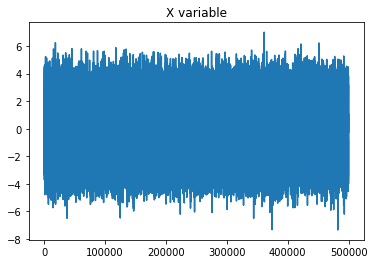

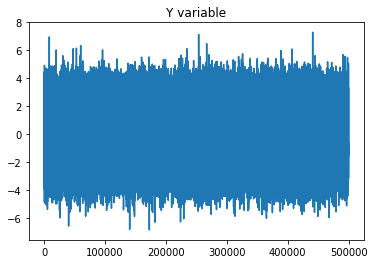

In [74]:
plt.title("X variable")
plt.plot(X)
plt.show()

plt.title("Y variable")
plt.plot(Y)
plt.show()

In [75]:
############# Let's try to solve the X series with a memory of p = 8 ##############

In [77]:
c = np.ones((l,1))

#this loop allows p to be different for each different combination of channels
#when solving with 5 memory steps, we solve 5^#number of channels least squares problems
for px in range(5): #number of memory points to look to minus 1
    print(str(px), "amount of x memory")
    for py in range(5):

        memMat = c
        hold = X

        for i in range(px):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        hold = Y
        for i in range(py):
            hold = np.roll(hold,1)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))
        ols = Ridge(alpha=0)
        ols.fit(memMat,X)
        print(ols.coef_)
        pred = ols.predict(memMat)
        error = np.linalg.norm((X-pred))
        print(error)

0 amount of x memory
[[0.]]
1022.6618754855372
[[0.         0.07918441]]
1019.5273865583384
[[ 0.          0.1161455  -0.06935496]]
1017.8016203222612
[[ 0.          0.11792614 -0.07209749  0.00336552]]
1017.7986916323979
[[ 0.          0.11790833 -0.07561854  0.00880153 -0.00668241]]
1017.7871455436017
1 amount of x memory
[[0.         0.60143481]]
817.0271910188391
[[ 0.          0.6039913  -0.01652695]]
816.8607085740847
[[ 0.          0.60364935  0.01812321 -0.06491699]]
814.9730995143576
[[ 0.          0.60377416  0.0125373  -0.05634392 -0.01051938]]
814.9373755267151
[[ 0.          0.60379196  0.01251021 -0.06108379 -0.00320139 -0.0089964 ]]
814.9112391663532
2 amount of x memory
[[ 0.          0.90249179 -0.50056577]]
707.2994466876463
[[ 0.00000000e+00  9.02425815e-01 -5.00592794e-01  5.31588255e-04]]
707.2992480920686
[[ 0.00000000e+00  9.02442112e-01 -5.00618534e-01  4.36136290e-04
   1.80472355e-04]]
707.2992315751463
[[ 0.00000000e+00  9.02441860e-01 -5.00621193e-01  5.1835

In [81]:
for px in [4,8,12,16,20]: #number of memory points to look to minus 1
    print(str(px), "memory points")
    py = px

    memMat = c
    hold = X

    for i in range(px):
        hold = np.roll(hold,1)
        hold[0] = 0
        memMat = np.hstack((memMat,hold))
    hold = Y
    for i in range(py):
        hold = np.roll(hold,1)
        hold[0] = 0
        memMat = np.hstack((memMat,hold))
    ols = Ridge(alpha=0)
    ols.fit(memMat,X)
    print(ols.coef_)
    pred = ols.predict(memMat)
    error = np.linalg.norm((X-pred))
    print(error)

4 memory points
[[ 0.00000000e+00  9.01411168e-01 -4.97880093e-01 -3.71560624e-03
   1.69682582e-03  1.13287127e-04  1.44452338e-03 -1.28531543e-03
   1.51440200e-03]]
707.2958091481694
8 memory points
[[ 0.00000000e+00  9.01411525e-01 -4.97874130e-01 -3.10017005e-03
   4.80318232e-04  7.28924245e-04  1.23247510e-03 -1.56947473e-03
   5.99174439e-05  1.11941425e-04  1.44994660e-03 -1.58137492e-03
   1.74452949e-03 -2.58466999e-04 -1.82611866e-03  1.75308476e-03
  -1.22012628e-03]]
707.2930656711562
12 memory points
[[ 0.00000000e+00  9.01397889e-01 -4.97869863e-01 -3.10271202e-03
   4.73312970e-04  7.28750842e-04  1.23609652e-03 -1.35476092e-03
   7.72367224e-05 -9.64695743e-04  2.98210536e-03 -2.86840989e-03
   1.54563328e-03  1.04982887e-04  1.45755116e-03 -1.58590083e-03
   1.74599548e-03 -2.61813999e-04 -1.82525450e-03  1.42822281e-03
  -2.08162703e-03 -3.69560154e-04 -5.66146410e-04 -2.42856358e-03
  -1.06799850e-03]]
707.2836119157522
16 memory points
[[ 8.20598324e+12  9.0139734